In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import os
import tweepy
import covid19

%matplotlib notebook

In [15]:
dfs = covid19.get_data_frames()
print(covid19.COUNTRIES)
# top 10 countries by cases
dfs[0].sort_values(dfs[0].columns[-1], ascending=False)

['United Kingdom', 'Italy', 'Spain', 'Germany', 'France', 'US', 'China', 'Korea, South', 'Japan']


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,1158040,1180375,1204351,1229331,1257023,1283929,1309550,1329260,1347881,1369376
187,NaN,Russia,60.0000,90.0000,0,0,0,0,0,0,...,134687,145268,155370,165929,177160,187859,198676,209688,221344,232243
201,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,217466,218011,219329,220325,221447,222857,223578,224350,227436,228030
223,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,...,186599,190584,194990,201101,206715,211364,215260,219183,223060,226463
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,210717,211938,213013,214457,215858,217185,218268,219070,219814,221216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
259,Saint Pierre and Miquelon,France,46.8852,-56.3159,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
78,Tibet,China,31.6927,88.0924,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
231,Diamond Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [16]:
# top 10 countries by deaths
dfs[1].sort_values(dfs[1].columns[-1], ascending=False).head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
225,NaN,US,37.0902,-95.7129,0,0,0,0,0,0,...,67682,68922,71064,73455,75662,77180,78795,79526,80682,82356
223,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,...,28446,28734,29427,30076,30615,31241,31587,31855,32065,32692
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,28884,29079,29315,29684,29958,30201,30395,30560,30739,30911
116,NaN,France,46.2276,2.2137,0,0,0,0,0,0,...,24864,25168,25498,25772,25949,26192,26271,26341,26604,26951
201,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,25264,25428,25613,25857,26070,26299,26478,26621,26744,26920
28,NaN,Brazil,-14.2350,-51.9253,0,0,0,0,0,0,...,7051,7367,7938,8588,9190,10017,10656,11123,11653,12461
23,NaN,Belgium,50.8333,4.0000,0,0,0,0,0,0,...,7844,7924,8016,8339,8415,8521,8581,8656,8707,8761
120,NaN,Germany,51.0000,9.0000,0,0,0,0,0,0,...,6866,6993,6993,7275,7392,7510,7549,7569,7661,7738
133,NaN,Iran,32.0000,53.0000,0,0,0,0,0,0,...,6203,6277,6340,6418,6486,6541,6589,6640,6685,6733
169,NaN,Netherlands,52.1326,5.2913,0,0,0,0,0,0,...,5056,5082,5168,5204,5288,5359,5422,5440,5456,5510


In [17]:
dfs[1]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,85,90,95,104,106,109,115,120,122,127
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,463,465,470,476,483,488,494,502,507,515
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,45,45,46,46,47,47,48,48,48,48
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,1,3,3,3,4,5,5,5,5,5
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2,2,4,5,5,7,7,8,9,10
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1


<IPython.core.display.Javascript object>


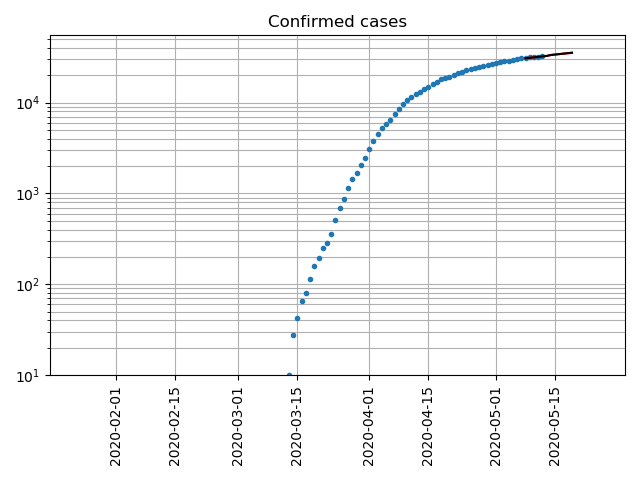

[   375.         -17261.66666667]
[128 129 130 131 132 133 135 136 137 138 139 140]
2020-01-22 00:00:00


<IPython.core.display.Javascript object>


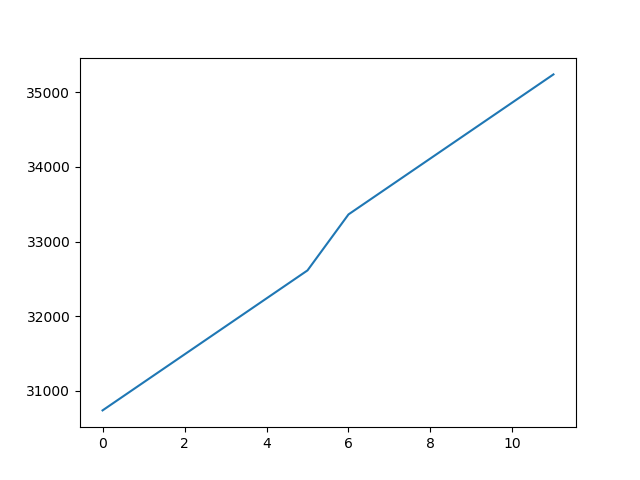

In [61]:
data = covid19.get_stats(dfs)
f = plt.figure()
a = f.add_subplot(111)
a.plot_date(data.dates, data.deaths['United Kingdom'], '.')
a.set_yscale('log')
a.set_ylim(10, )
a.set_title('Confirmed cases')
xL = a.get_xlim()
a.set_xlim(xL[0], xL[1]+14)
plt.sca(a)
a.grid(which='both', axis='both')
plt.xticks(rotation=90)
plt.tight_layout()

# linear fit to last 5 days
day_numbers = (data.dates.year-2020)*365 + data.dates.dayofyear
days_to_fit = day_numbers[-6:]
n_to_fit = data.deaths['United Kingdom'][-6:]
p = np.polyfit(days_to_fit, n_to_fit, 1)
pl = np.polyfit(days_to_fit, np.log(n_to_fit), 1)

print(p)
d_extend = np.append(days_to_fit, days_to_fit+7)
print(d_extend)
linear_fit = p[0] * d_extend + p[1]
log_fit = np.exp(pl[1]) * np.exp(d_extend * pl[0])

pds = data.dates + datetime.timedelta(days=7)
a.plot_date(pds[-len(d_extend):], linear_fit, '-r')
a.plot_date(pds[-len(d_extend):], log_fit, '-k')
#dt = datetime.timedelta(days=)
print(data.dates[0])
#plt.figure()
#plt.plot_date(data.dates, data.deaths['United Kingdom'], '.')
plt.figure()
plt.plot(linear_fit)

In [59]:
print(linear_fit)

[30738.33333333 31113.33333333 31488.33333333 31863.33333333
 32238.33333333 32613.33333333 33363.33333333 33738.33333333
 34113.33333333 34488.33333333 34863.33333333 35238.33333333]


In [60]:
print(log_fit)

[40.1832259  40.66223143 41.14694696 41.63744056 42.13378111 42.6360383
 43.65858557 44.17901925 44.70565677 45.23857209 45.77784005 46.32353637]
